In [2]:
from pdfparser import Parser
import pdfplumber
from pdfplumber.page import Page
from pdfplumber.table import Table
from typing import List, Dict


In [3]:
parser=Parser('600532_20220630_7_VGpbzsCk.pdf')

Msg from find_header: 页眉为'2021年年度报告'
Msg from find_toc: 在第4页找到目录


In [3]:
print(parser.pdf.pages[10].chars[0])

{'matrix': (1, 0, 0, 1, 254.93, 790.2), 'fontname': 'ABCDEE+Calibri', 'adv': 4.563, 'upright': True, 'x0': 254.93, 'y0': 787.95, 'x1': 259.493, 'y1': 796.95, 'width': 4.562999999999988, 'height': 9.0, 'size': 9.0, 'object_type': 'char', 'page_number': 11, 'text': '2', 'stroking_color': 0, 'non_stroking_color': 0, 'top': 44.969999999999914, 'bottom': 53.969999999999914, 'doctop': 8464.169999999998}


In [ ]:
def find_headline(self:Parser):
    font_size_dict:Dict[str,List[int]]={}
    last_adv=None
    for page in self.pdf.pages:
        for char in page.chars:
            if char['fontname'] not in font_size_dict:
                font_size_dict[char['fontname']]=[]
            if last_adv!=char['fontname']:
                font_size_dict[char['fontname']].append('')
            font_size_dict[char['fontname']][-1]+=char['text']
            last_adv=char['fontname']
    print(font_size_dict)
find_headline(parser)

In [16]:
def del_header(self:Parser):
    header_num=self.headers.total_header
    header_text_list=self.headers.get_header_text()
    header_exist=True
    for page_index,page in enumerate(self.pdf.pages):
        for i in range(header_num):
            if self.all_page_words[page_index][i]['text']!=header_text_list[i]:
                header_exist=False
                break
        if header_exist:
            bottom=self.all_page_words[page_index][header_num-1]['bottom']
            self.del_header_pages.append(page.crop(bbox=[0,bottom,page.width,page.height]))
        header_exist=True
            

del_header(parser)


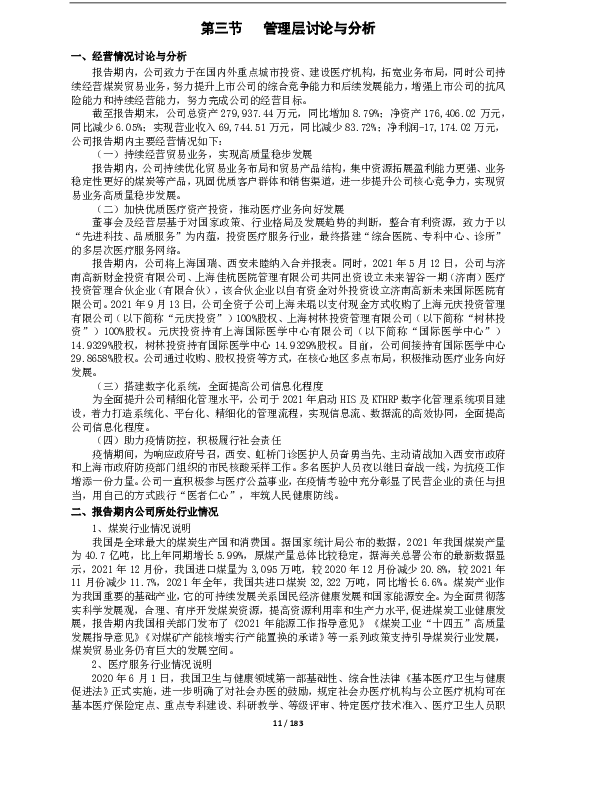

In [18]:
page=parser.del_header_pages[10]
im=page.to_image()
im.show()